<a href="https://colab.research.google.com/github/alexitoaaa/1.125_final_project/blob/main/heart_failure_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network
from sklearn import svm
#import scikitplot as skplt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
# tensorflow lib
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.models import Sequential

import warnings
warnings.simplefilter(action='ignore')


# New Section

In [ ]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://raw.githubusercontent.com/alexitoaaa/1.125_final_project/main/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
# basic information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#  target feature 
data.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [ ]:
# assiging Y variable
Y = data['DEATH_EVENT']
X = data.drop(["DEATH_EVENT"],axis=1)

In [ ]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

Define Target and Independent Features

In [ ]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [ ]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,47
anaemia,2
creatinine_phosphokinase,208
diabetes,2
ejection_fraction,17
high_blood_pressure,2
platelets,176
serum_creatinine,40
serum_sodium,27
sex,2


In [ ]:
# categorical features
slice1=df_value_counts.loc[df_value_counts['feature_levels']<=2]
cat_list=slice1.index
cat=num.loc[:,cat_list]
cat.dtypes

anaemia                int64
diabetes               int64
high_blood_pressure    int64
sex                    int64
smoking                int64
dtype: object

In [ ]:
# numerical features
slice2=df_value_counts.loc[df_value_counts['feature_levels']>2]
num_list=slice2.index
num=num.loc[:,num_list]

EDA

In [ ]:
#  selecting color pallete
col_pal_1 = sns.color_palette("cool",n_colors=2)
col_pal_2 = sns.color_palette("cool",n_colors=7)

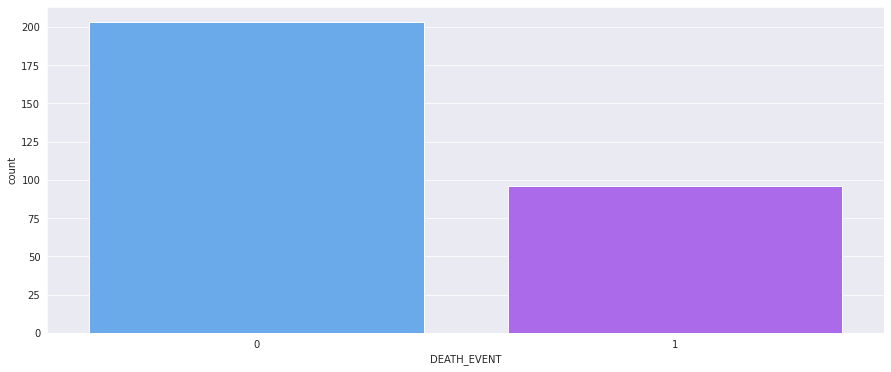

In [ ]:
# evaluate the target to find out data is imbalanced or not
sns.countplot(x= data["DEATH_EVENT"], palette= col_pal_1)

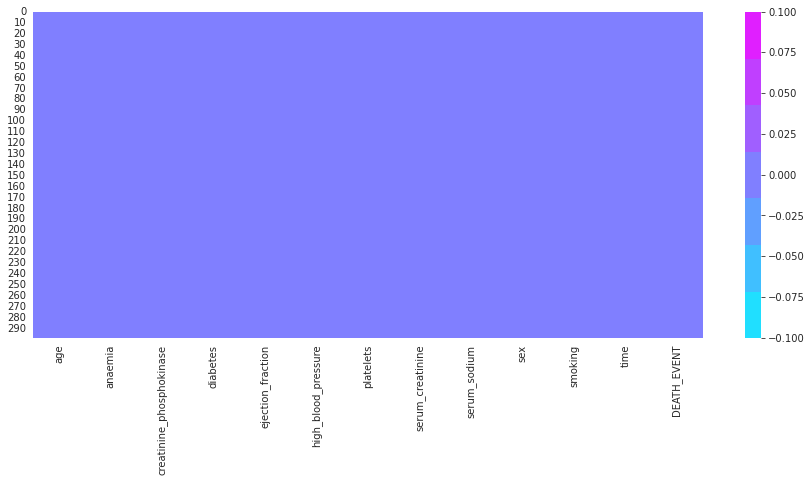

In [ ]:
# Visualization of missing values in dataset
sns.heatmap(data.isnull(),cmap=col_pal_2);

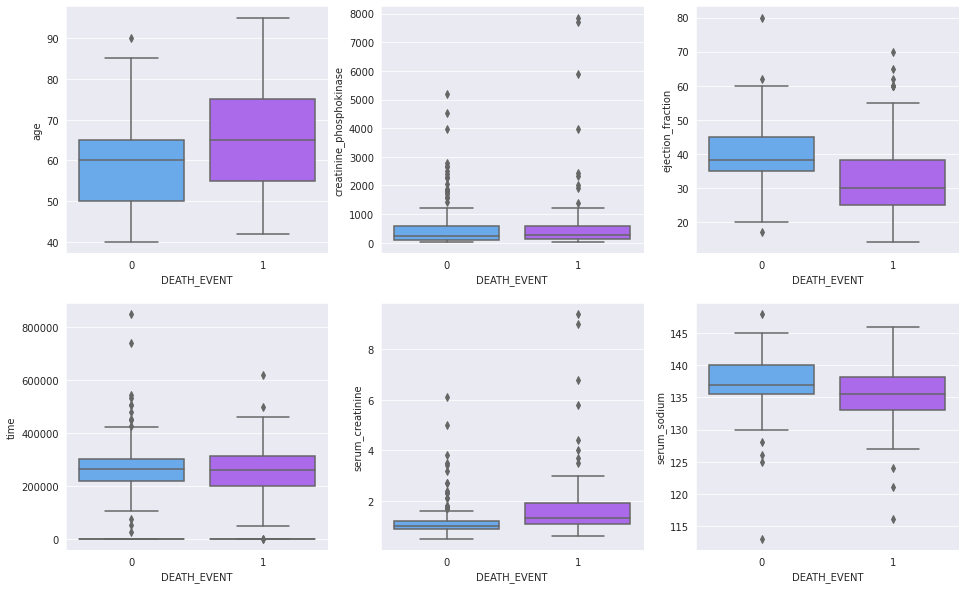

In [ ]:
# Outlier Analysis for Numerical Features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
i=0
j=0
for col in num:
  sns.boxplot(x=Y,y=col,data=num,ax=axes[i,j],palette=col_pal_1)
  j+=1
  if j==3 :
    j=0
    i=1
plt.show()

In [ ]:
def distribution(dataset, feature, title, bins =30):
    fig,ax = plt.subplots(figsize=(9,5))
    ax.set_title(title)
    sns.distplot(dataset[feature],color ='b', bins = bins, hist=True, kde=True, ax = ax)

In [ ]:
data["age"].loc[data['DEATH_EVENT']==1].mean()

65.21528124999999

In [ ]:
def heart_failure_estimator(dataset, feature1,feature2, title):
    fig,ax = plt.subplots(figsize=(9,5))
    ax.set_title(title)
    sns.kdeplot(x=dataset[feature1], shade=True, hue=dataset[feature2], palette = col_pal_1)

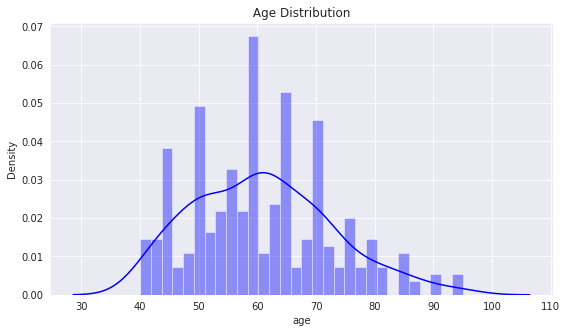

In [ ]:
distribution(data, "age", " Age Distribution ")

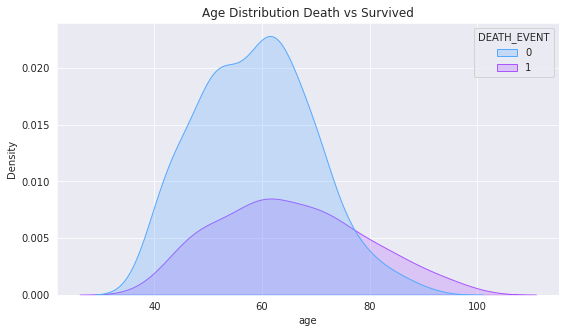

In [ ]:
heart_failure_estimator(data, "age","DEATH_EVENT", "Age Distribution Death vs Survived")

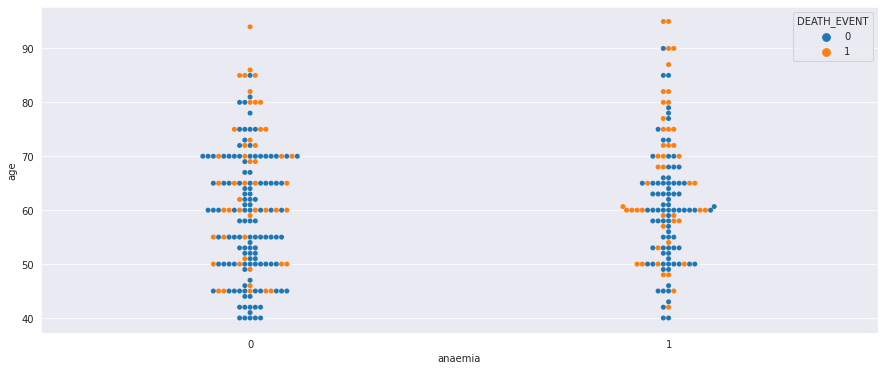

In [ ]:
sns.swarmplot(y=data["age"], x=data["anaemia"], hue = data["DEATH_EVENT"])

In [ ]:
# Bi Variate Analysis for Numerical Features (Feature Discretization)

from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.tail()

,age_Rank,creatinine_phosphokinase_Rank,ejection_fraction_Rank,platelets_Rank,serum_creatinine_Rank,serum_sodium_Rank,time_Rank
294,5.0,0.0,4.0,1.0,4.0,9.0,9.0
295,3.0,9.0,4.0,6.0,5.0,7.0,9.0
296,1.0,9.0,7.0,9.0,1.0,6.0,9.0
297,1.0,9.0,4.0,0.0,6.0,8.0,9.0
298,2.0,4.0,5.0,9.0,6.0,4.0,9.0


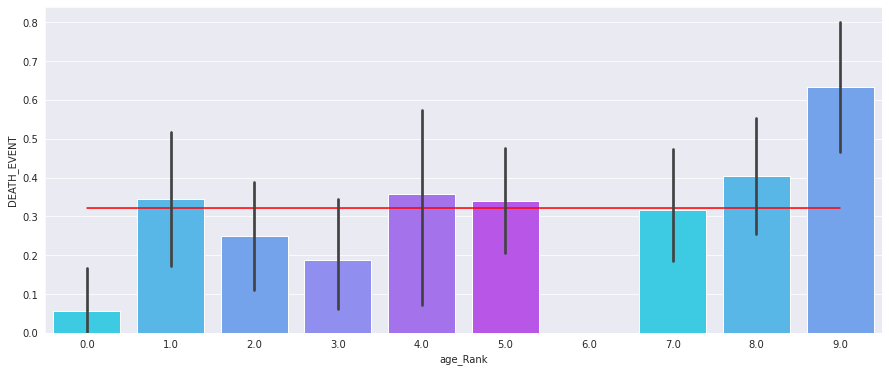

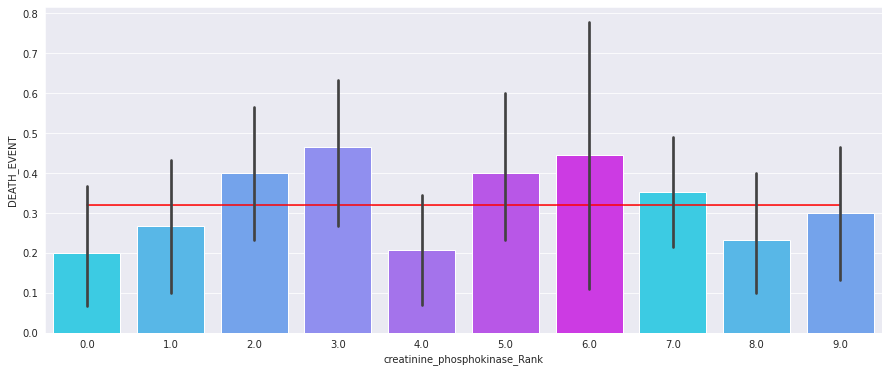

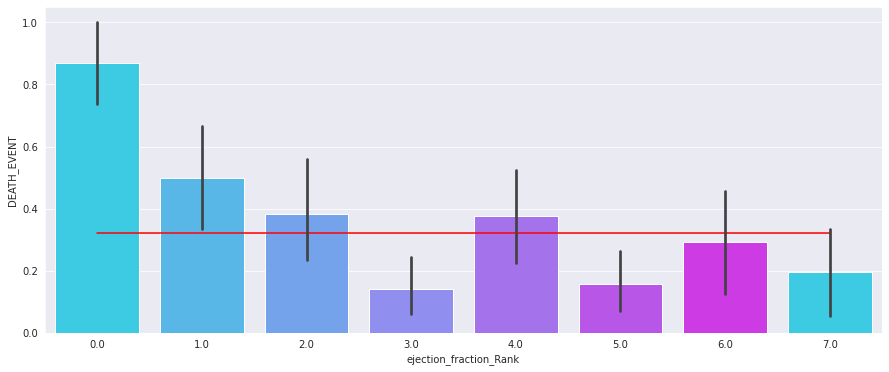

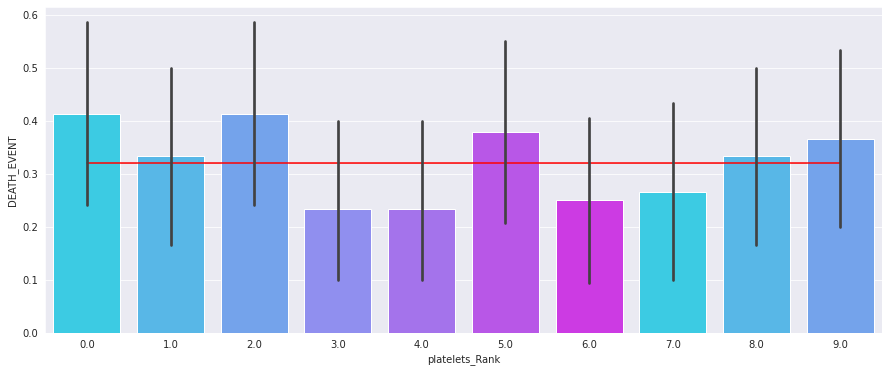

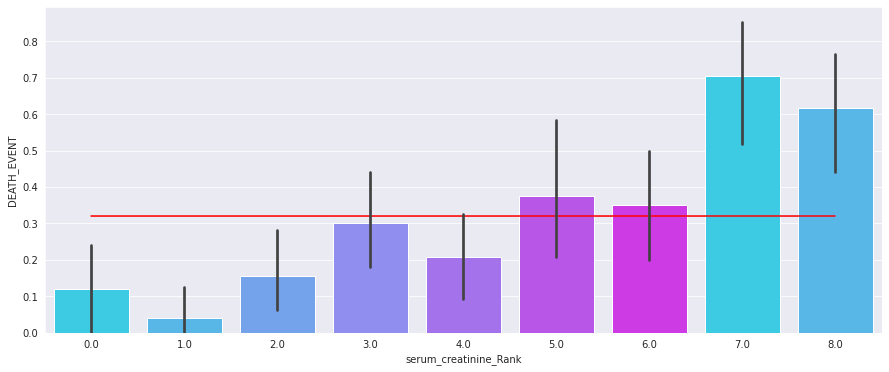

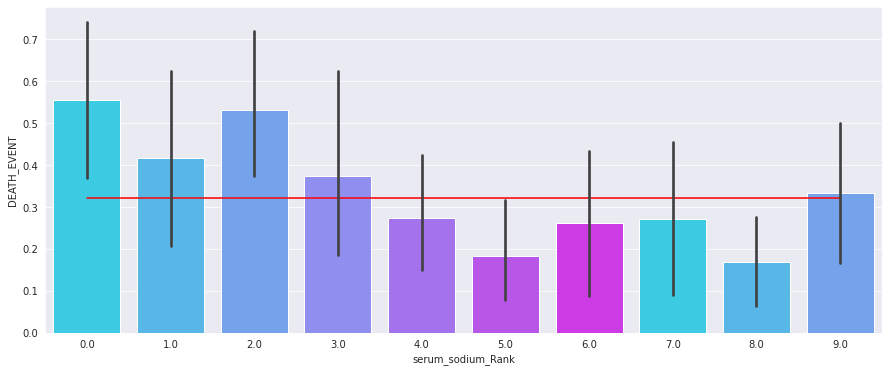

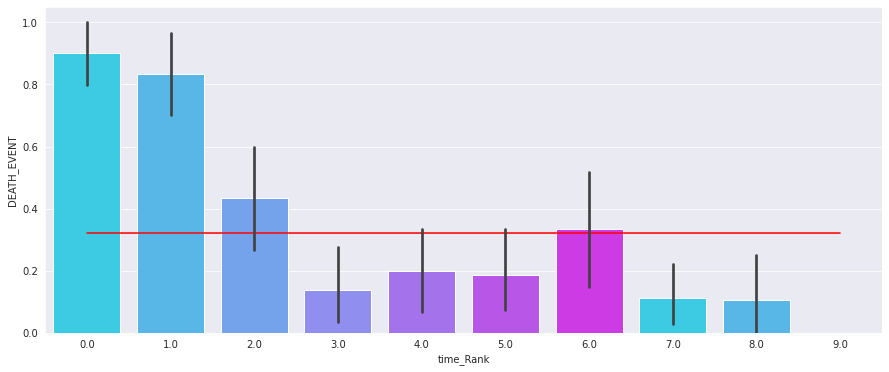

In [ ]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=Y.mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y=Y,data=X_bin_combined,palette=col_pal_2 )
plt.show()

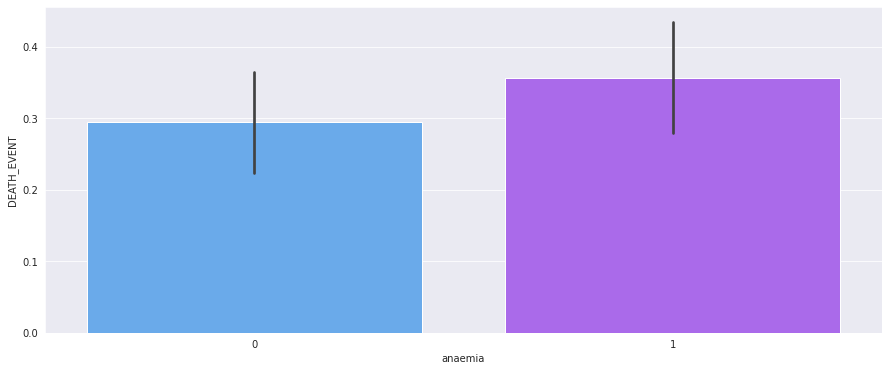

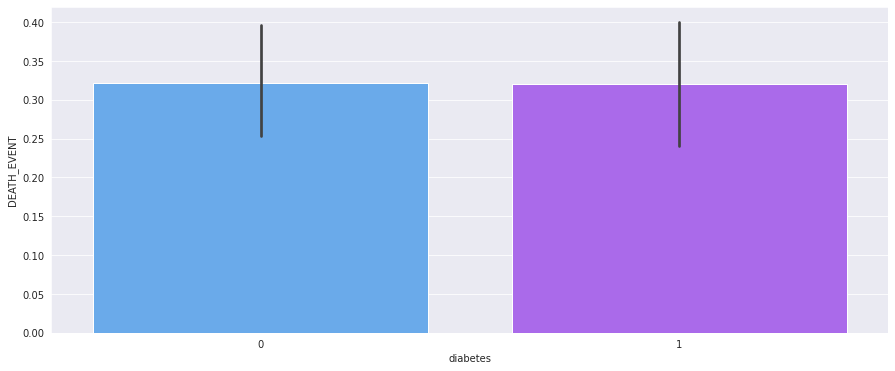

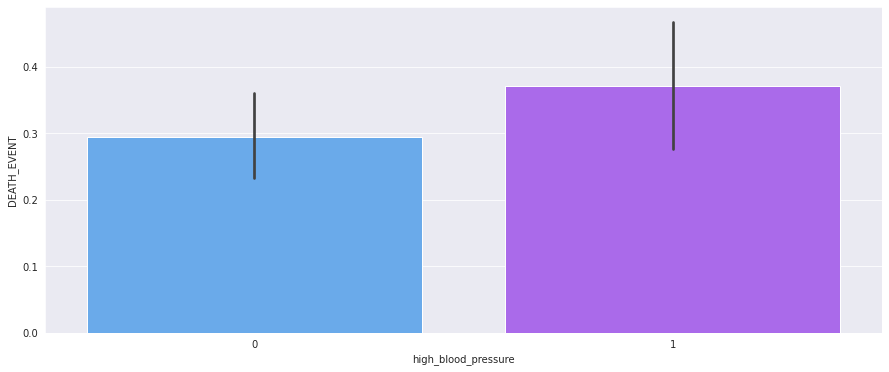

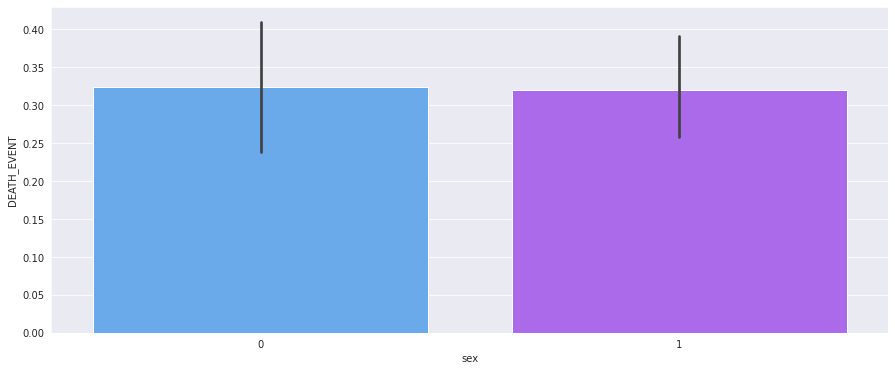

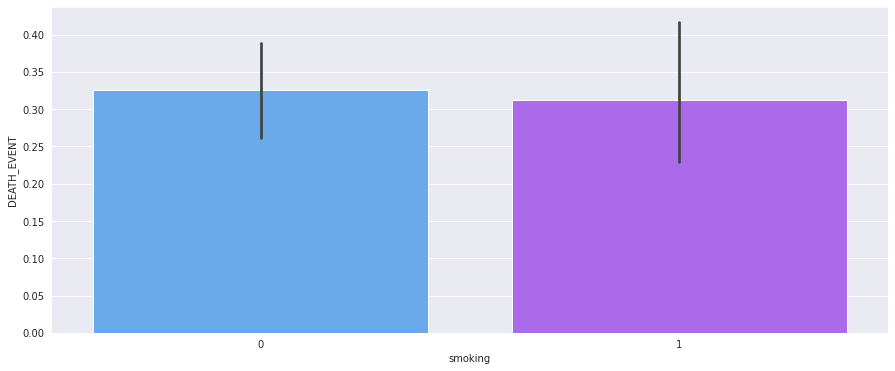

In [ ]:
#  Bi Variate Analysis (Categorical Features)
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,cat],axis=1,join='inner')

from numpy import mean
for col in (cat.columns):
    plt.figure()
    sns.barplot(x=col, y=Y,data=X_char_merged, estimator=mean ,palette=col_pal_1)
plt.show()

Feature Selection - Numerical Features 

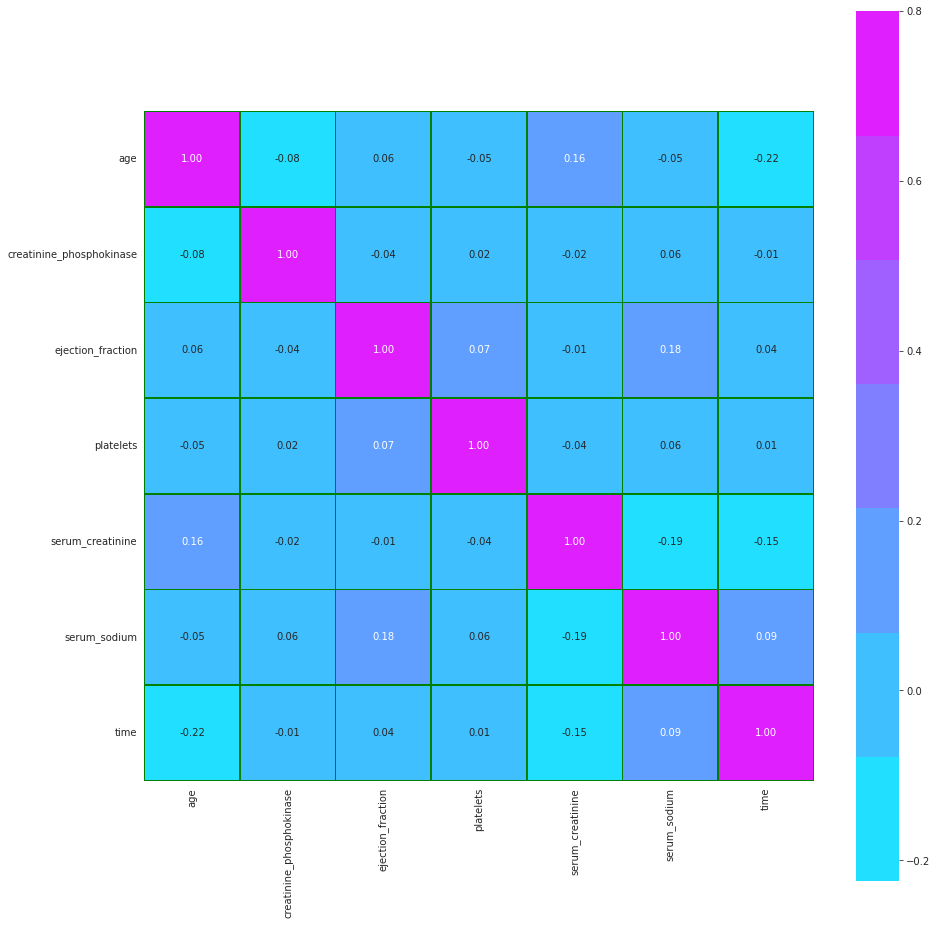

In [ ]:
# Checking corelation between numerical features
plt.figure(figsize=(15,16))
cor =num.corr()
sns.heatmap(cor,annot=True,vmax=0.8,cmap=col_pal_2,fmt='.2f',linecolor='green',linewidths=0.7,square=True)

In [ ]:
# Remove Features with 0 Variance

from sklearn.feature_selection import VarianceThreshold
varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num.iloc[:,cols]

In [ ]:
# Chi-Squared for feature selection using SelectKBest

from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=6)
selector.fit_transform(num, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_num = num_1.iloc[:,cols]
select_features_df_num.iloc[0]

age                             75.0
creatinine_phosphokinase       582.0
ejection_fraction               20.0
platelets                   265000.0
serum_creatinine                 1.9
time                             4.0
Name: 0, dtype: float64

Split Features into Numerical and Categorical

In [ ]:
# Dropping categorical features after analysis

charlist=['diabetes']
char=cat.drop(charlist,axis=1)

Feature Engineering

In [ ]:
# transfering numerical features 'age'into categorical feature
char['Age_level']= pd.qcut(select_features_df_num['age'].rank(method='first'),3,labels=['young','medium','old'])  

In [ ]:
# # dropping feature age from numerical feature for removing multicolinearity
select_features_df_num.drop(columns='age',axis=1,inplace=True)

In [ ]:
# Creating dummy features for categorical feature 'Age_level'  with n-1 levels

char = pd.get_dummies(char,drop_first = True)

In [ ]:
# joining categorical and numerical features
X_all=pd.concat([select_features_df_num,char],axis=1,join='inner')

In [ ]:
X_all.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,time,anaemia,high_blood_pressure,sex,smoking,Age_level_medium,Age_level_old
0,582,20,265000.00,1.9,4,0,1,1,0,0,1
1,7861,38,263358.03,1.1,6,0,0,1,0,0,0
2,146,20,162000.00,1.3,7,0,0,1,1,1,0
3,111,20,210000.00,1.9,7,1,0,1,0,0,0
4,160,20,327000.00,2.7,8,1,0,0,0,1,0


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_all,Y,test_size=0.2,random_state=200)

Model Building

In [ ]:
#  Model training and evaluation
acc_list =[]
def modelEval(xtr,ytr,xte,yte,model):
    
    model.fit(xtr,ytr)
    
    # Prediction for Test and Train Dataset
    test_pred=model.predict(xte)
    train_pred =model.predict(xtr)
    
    tpr_score = metrics.precision_score(ytr, train_pred)
    trc_score = metrics.recall_score(ytr, train_pred)
    tac_score =metrics.accuracy_score(ytr,train_pred)

    # Making Confusion Matrix and calculating accuracy score
    print("For Training Dataset.")   
    print(f'Accuracy: {tac_score:.4f}, Precision: {tpr_score:.2f}, Recall: {trc_score:.2f}')
    print("===============================")
    pr_score = metrics.precision_score(yte, test_pred)
    rc_score = metrics.recall_score(yte, test_pred)
    ac_score = metrics.accuracy_score(yte, test_pred)
    acc_list.append(ac_score)
    print("===============================")
    print("===============================")
    print("For Testing Dataset")
    print("===============================")
    print("F1:",metrics.f1_score(yte, test_pred))
    print(f'Accuracy: {ac_score:.2f}, Precision: {pr_score:.2f}, Recall: {rc_score:.2f}')
    print("===============================")
#     print(metrics.confusion_matrix(yte,test_pred))
    print(classification_report(yte,test_pred))
    metrics.plot_confusion_matrix(model,xte,yte,cmap='YlGnBu')
    
    y_pred_proba = model.predict_proba(xte)[::,1]
    auc_score = metrics.roc_auc_score(yte, y_pred_proba)
    fpr, tpr, _ = metrics.roc_curve(yte,  y_pred_proba)
    
    return (auc_score,fpr,tpr)

Model Name : Logistic Regression
For Training Dataset.
Accuracy: 0.8661, Precision: 0.84, Recall: 0.73
For Testing Dataset
F1: 0.6451612903225806
Accuracy: 0.82, Precision: 0.71, Recall: 0.59
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        43
           1       0.71      0.59      0.65        17

    accuracy                           0.82        60
   macro avg       0.78      0.75      0.76        60
weighted avg       0.81      0.82      0.81        60



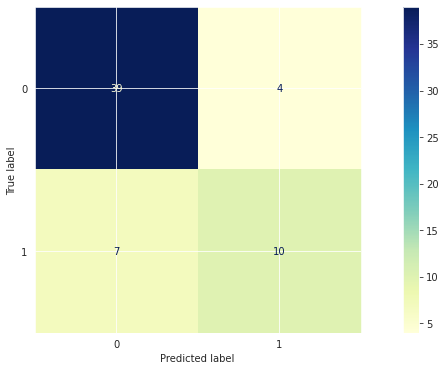

In [ ]:
# instantiate the model 

print("Model Name : Logistic Regression")
model_logreg = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(random_state=101))

# fit the model with data
log_model_Acc = modelEval(X_train,y_train,X_test,y_test,model_logreg) 

Model Name : Decision Tree
For Training Dataset.
Accuracy: 0.8703, Precision: 0.79, Recall: 0.82
For Testing Dataset
F1: 0.7272727272727272
Accuracy: 0.85, Precision: 0.75, Recall: 0.71
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        43
           1       0.75      0.71      0.73        17

    accuracy                           0.85        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.85      0.85      0.85        60



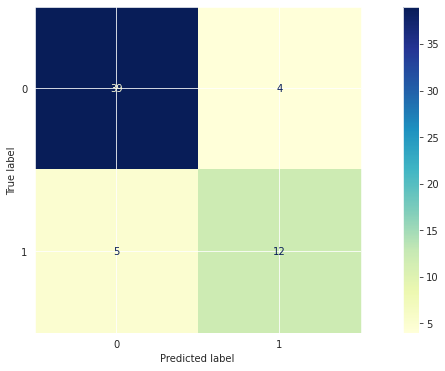

In [ ]:
print("Model Name : Decision Tree")
# model_dt = DecisionTreeClassifier(random_state=7, max_depth= 7, min_samples_leaf= 9, min_samples_split= 9)
                                  
model_dt = make_pipeline(preprocessing.StandardScaler(),DecisionTreeClassifier(random_state=7, max_depth= 6,
                                                                            min_samples_leaf= 9, min_samples_split= 9))
dt_model_Acc = modelEval(X_train,y_train,X_test,y_test,model_dt)

Random Forest

Model Name : RandomForest
For Training Dataset.
Accuracy: 0.8870, Precision: 0.88, Recall: 0.76
For Testing Dataset
F1: 0.7586206896551724
Accuracy: 0.88, Precision: 0.92, Recall: 0.65
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.92      0.65      0.76        17

    accuracy                           0.88        60
   macro avg       0.90      0.81      0.84        60
weighted avg       0.89      0.88      0.88        60



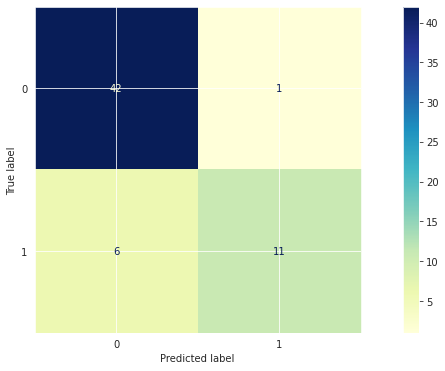

In [ ]:
print("Model Name : RandomForest")

model_rf = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(n_estimators=50,max_depth=6, min_samples_leaf=9,
                                             min_samples_split=16, random_state=42))
rf_model_Acc = modelEval(X_train,y_train,X_test,y_test,model_rf)

SVC

Model Name : SVC
For Training Dataset.
Accuracy: 0.8577, Precision: 0.83, Recall: 0.72
For Testing Dataset
F1: 0.6875
Accuracy: 0.83, Precision: 0.73, Recall: 0.65
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.73      0.65      0.69        17

    accuracy                           0.83        60
   macro avg       0.80      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



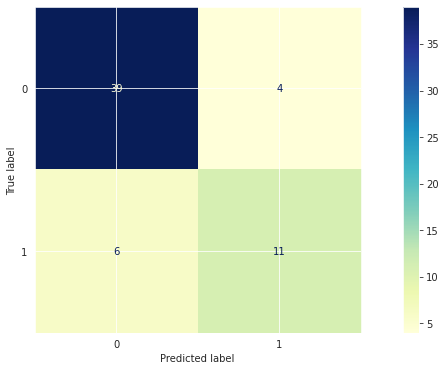

In [ ]:
print("Model Name : SVC")

model_svc = make_pipeline(preprocessing.StandardScaler(), SVC(C =.7, random_state=1, kernel = 'linear',probability=True))
# fit the model with data
svc_model_Acc = modelEval(X_train,y_train,X_test,y_test,model_svc)

Naive Bayes

Model Name : Naive Bayes
For Training Dataset.
Accuracy: 0.7573, Precision: 0.74, Recall: 0.41
For Testing Dataset
F1: 0.4444444444444445
Accuracy: 0.75, Precision: 0.60, Recall: 0.35
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        43
           1       0.60      0.35      0.44        17

    accuracy                           0.75        60
   macro avg       0.69      0.63      0.64        60
weighted avg       0.73      0.75      0.73        60



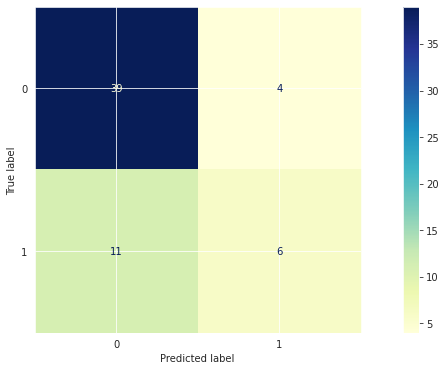

In [ ]:
print("Model Name : Naive Bayes")
# model_NB = GaussianNB()
model_NB = make_pipeline(preprocessing.MinMaxScaler(),GaussianNB())
nb_model_Acc = modelEval(X_train,y_train,X_test,y_test,model_NB)

KNN

In [ ]:

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

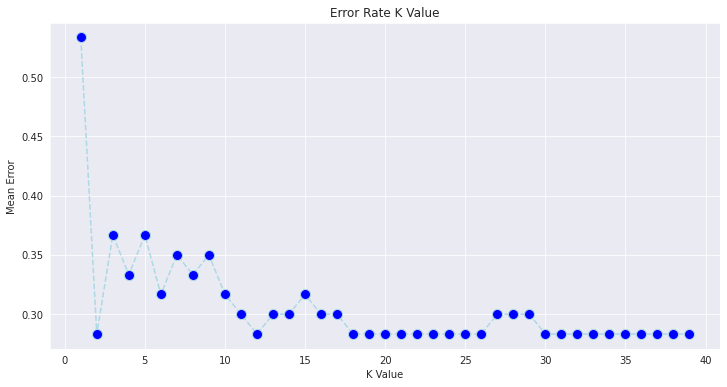

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='lightblue', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

Model Name : KNeighborsClassifier:
For Training Dataset.
Accuracy: 0.8368, Precision: 0.84, Recall: 0.62
For Testing Dataset
F1: 0.4666666666666667
Accuracy: 0.73, Precision: 0.54, Recall: 0.41
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        43
           1       0.54      0.41      0.47        17

    accuracy                           0.73        60
   macro avg       0.66      0.64      0.64        60
weighted avg       0.72      0.73      0.72        60



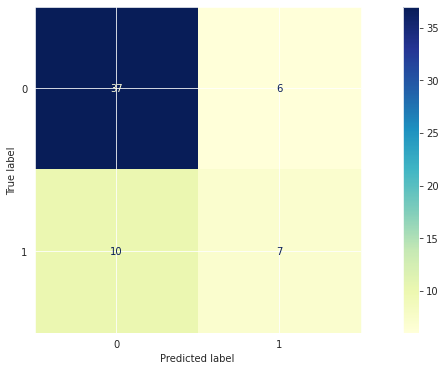

In [ ]:
model_knn = make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(n_neighbors=3))
print("Model Name : KNeighborsClassifier:")
knn_model_Acc = modelEval(X_train,y_train,X_test,y_test,model_knn) 

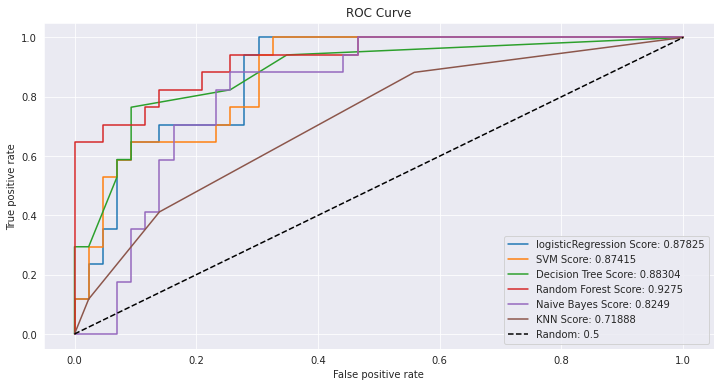

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(log_model_Acc[1], log_model_Acc[2], label = 'logisticRegression Score: ' + str(round(log_model_Acc[0], 5)))
plt.plot(svc_model_Acc[1], svc_model_Acc[2], label = 'SVM Score: ' + str(round(svc_model_Acc[0], 5)))
plt.plot(dt_model_Acc[1], dt_model_Acc[2], label = 'Decision Tree Score: ' + str(round(dt_model_Acc[0], 5)))
plt.plot(rf_model_Acc[1], rf_model_Acc[2], label = 'Random Forest Score: ' + str(round(rf_model_Acc[0], 5)))
plt.plot(nb_model_Acc[1], nb_model_Acc[2], label = 'Naive Bayes Score: ' + str(round(nb_model_Acc[0], 5)))
plt.plot(knn_model_Acc[1], knn_model_Acc[2], label = 'KNN Score: ' + str(round(knn_model_Acc[0], 5)))

plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
# plt.legend(loc="lower right")
plt.show()

In [ ]:
model_list = ["Logistic Regression", "SupportVector","Decision Tree","Random Forest","Naive Bayes","KNN"]

Cross Validation K-fold

In [ ]:
kf= KFold(n_splits=10)

In [ ]:
cross_Acc = []
def cross_valAccuracy(model_name,model,X,Y,kf):

  print("Model Name :",model_name)
  kfold_score = cross_val_score(model, X=X, y= Y, cv=kf,scoring='accuracy')
  print("The mean cross validation scores of k-fold method with 10 folds is",kfold_score.mean())
  cross_Acc.append(kfold_score.mean())
  # print("The std cross validation scores of k-fold method with 10 folds is",kfold_score.std())
  print("*****************************")

In [ ]:
cross_valAccuracy("Logistic Regression",model_logreg,X_all,Y,kf)
cross_valAccuracy("SVC",model_svc,X_all,Y,kf)
cross_valAccuracy("Decision Tree",model_dt,X_all,Y,kf)
cross_valAccuracy("Random Forest",model_rf,X_all,Y,kf)
cross_valAccuracy("Naive Bayes",model_NB,X_all,Y,kf)
cross_valAccuracy("KNN",model_knn,X_all,Y,kf)

Model Name : Logistic Regression
The mean cross validation scores of k-fold method with 10 folds is 0.82
*****************************
Model Name : SVC
The mean cross validation scores of k-fold method with 10 folds is 0.8033333333333335
*****************************
Model Name : Decision Tree
The mean cross validation scores of k-fold method with 10 folds is 0.8164367816091953
*****************************
Model Name : Random Forest
The mean cross validation scores of k-fold method with 10 folds is 0.85
*****************************
Model Name : Naive Bayes
The mean cross validation scores of k-fold method with 10 folds is 0.746551724137931
*****************************
Model Name : KNN
The mean cross validation scores of k-fold method with 10 folds is 0.6998850574712645
*****************************


In [ ]:
plt.rcParams['figure.figsize']=15,6 
# sns.set_style("darkgrid")
ax = sns.barplot(x=model_list, y=acc_list, palette = col_pal_2, saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

NameError: ignored